In [13]:
import pickle
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from distance_result import DistanceResult
from utils import get_ranked_df_per_perturbation, calc_rank_percentile, get_melted_df_per_perturbation
from utils import get_flat_df, normalize_per_metric, plt_legend

sc.set_figure_params(dpi=100, frameon=False, facecolor=None)

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dss_path = '/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93zoj'

In [4]:
%%time
with open(f'{dss_path}/metric_runs_sciplex.pkl', 'rb') as file:
    results = pickle.load(file)
print(results.keys())

dict_keys(['100-pca-n_cells', '0.284-lognorm-count_mean', '0.264-lognorm-count_mean', '0.243-lognorm-count_mean', '0.222-lognorm-count_mean', '0.201-lognorm-count_mean', '0.179-lognorm-count_mean', '0.157-lognorm-count_mean', '0.134-lognorm-count_mean', '0.111-lognorm-count_mean', '10-lognorm-n_DEGs', '50-lognorm-n_DEGs', '100-lognorm-n_DEGs', '150-lognorm-n_DEGs', '200-lognorm-n_DEGs', '10-lognorm-n_genes', '50-lognorm-n_genes', '100-lognorm-n_genes', '500-lognorm-n_genes', '1000-lognorm-n_genes', '5000-lognorm-n_genes', '100-lognorm-n_cells', '100-counts-n_cells', '150-pca-n_cells', '150-lognorm-n_cells', '150-counts-n_cells', '200-pca-n_cells', '200-lognorm-n_cells', '200-counts-n_cells', '250-pca-n_cells', '250-lognorm-n_cells', '250-counts-n_cells', '270-pca-n_cells', '270-lognorm-n_cells', '270-counts-n_cells'])
CPU times: user 607 ms, sys: 16.5 s, total: 17.1 s
Wall time: 35.5 s


In [5]:
metrics = list(results.values())[0].metrics
metrics

['wasserstein',
 'spearman_distance',
 'mmd',
 'kl_divergence',
 'r2_distance',
 't_test',
 'mean_absolute_error',
 'pearson_distance',
 'euclidean']

In [6]:
controls = ['control0', 'control1', 'control2', 'control3', 'control4']

In [11]:
# %load plotting_util.py
def plot(tags, plot=True):
    label_tag = tags[0]
    
    pwdfs = {}
    for k, res in results.items():
        if all(t in k for t in tags):
            pwdfs.update(res.pwdfs)
    
    if len(pwdfs) < 2:
        raise ValueError(f'Conditions {tags} were not run.')

    individually_ranked = get_ranked_df_per_perturbation(pwdfs, metrics, controls, label_tag)
    ctrl_ranks = calc_rank_percentile(individually_ranked, controls)

    if plot:
        melted_df = get_flat_df(pwdfs, controls, label=label_tag)
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=normalize_per_metric(melted_df), x=label_tag, y='avg_dist', hue='metric')
        plt.ylabel('relative avg dist');
        if 'n_genes' in label_tag:
            plt.xscale('log')
        plt_legend()
        plt.title(f'distance behavior w.r.t {label_tag} in {tags[1]} space')
        plt.show()

        ctrl_ranks[label_tag] = ctrl_ranks[label_tag].astype(float)
        plt.figure(figsize=(10, 5))
        sns.lineplot(data=ctrl_ranks, x=label_tag, y='rank', hue='metric')
        plt.ylabel('control rank percentile')
        plt.ylim(-.05, 1)
        if 'n_genes' in label_tag:
            plt.xscale('log')
        plt_legend()
        plt.title(f'sensitivity w.r.t. {label_tag} in {tags[1]} space')
        plt.show()
    
    return pwdfs, ctrl_ranks


## n_cells

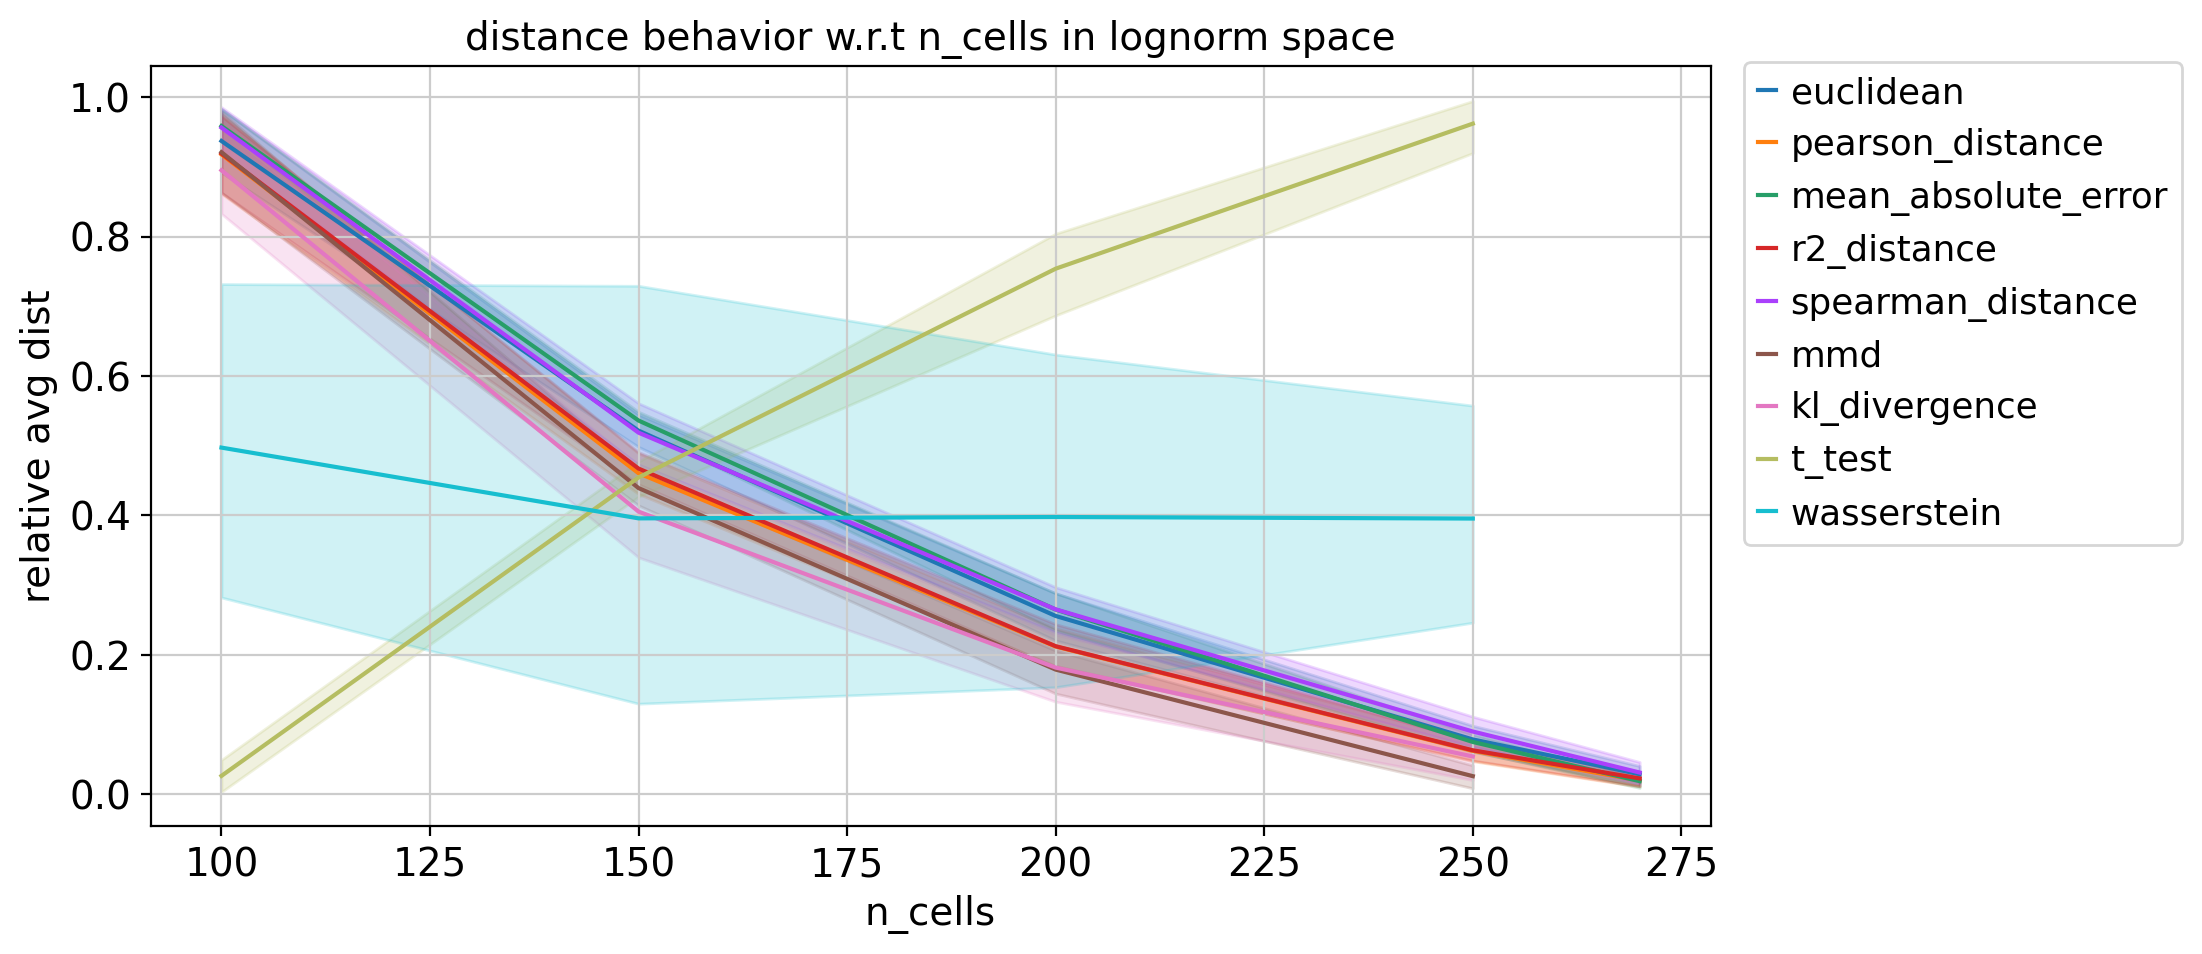

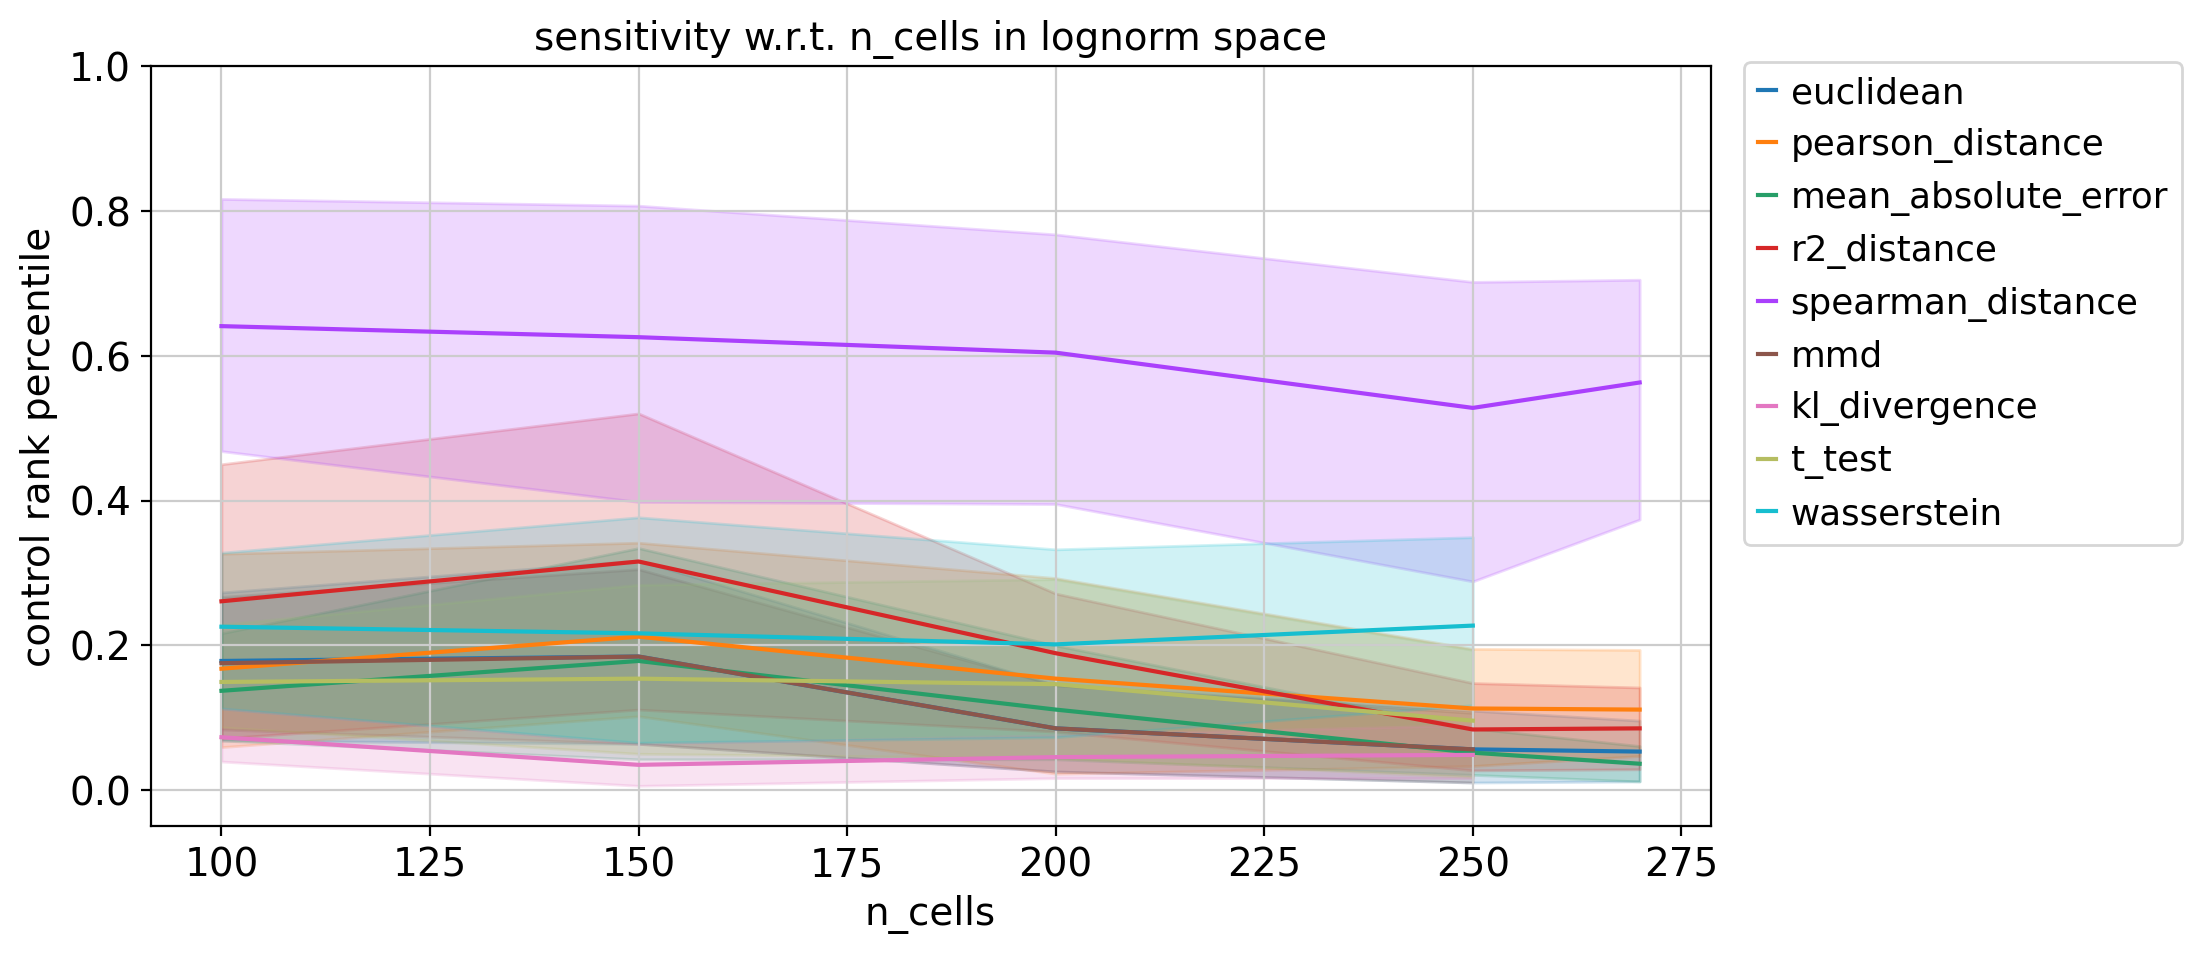

In [14]:
pwdfs = plot(['n_cells', 'lognorm'])

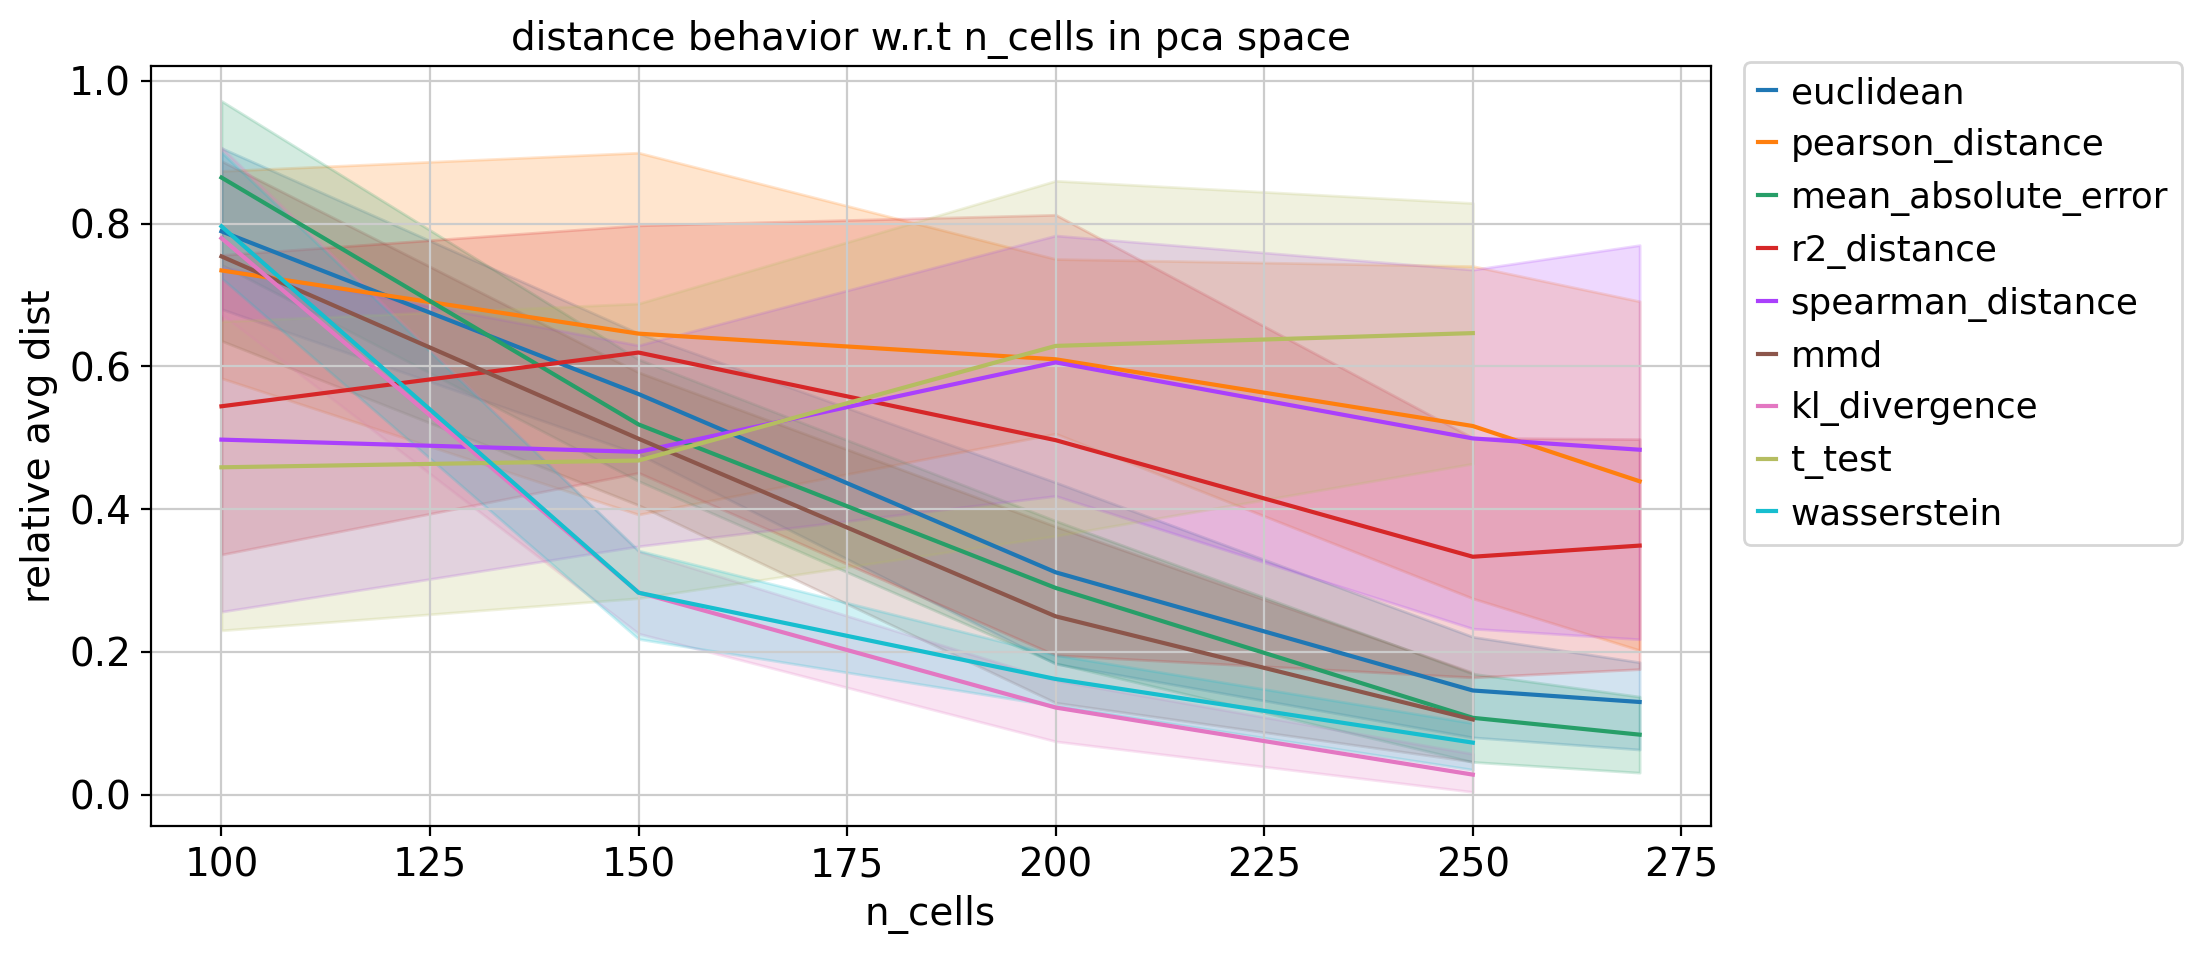

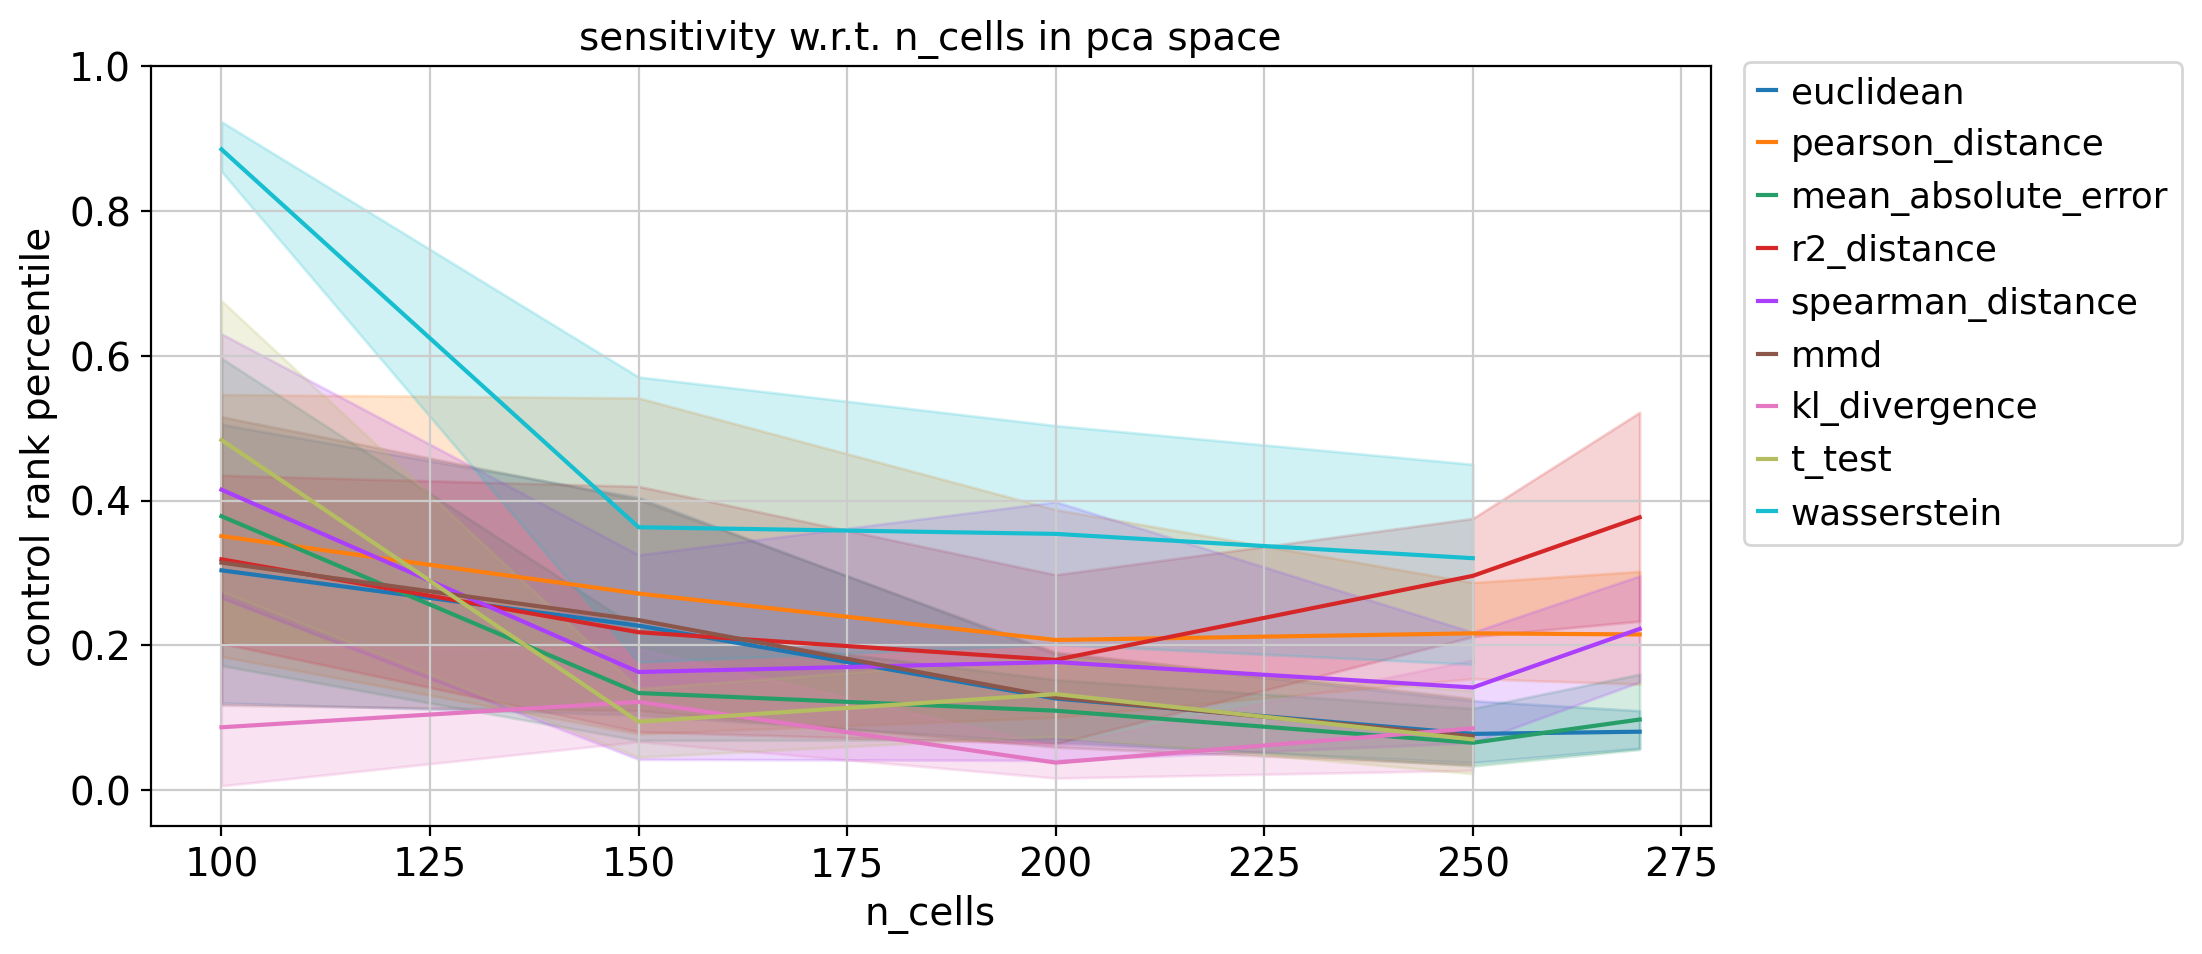

In [15]:
pwdfs = plot(['n_cells', 'pca'])

## n HVGs

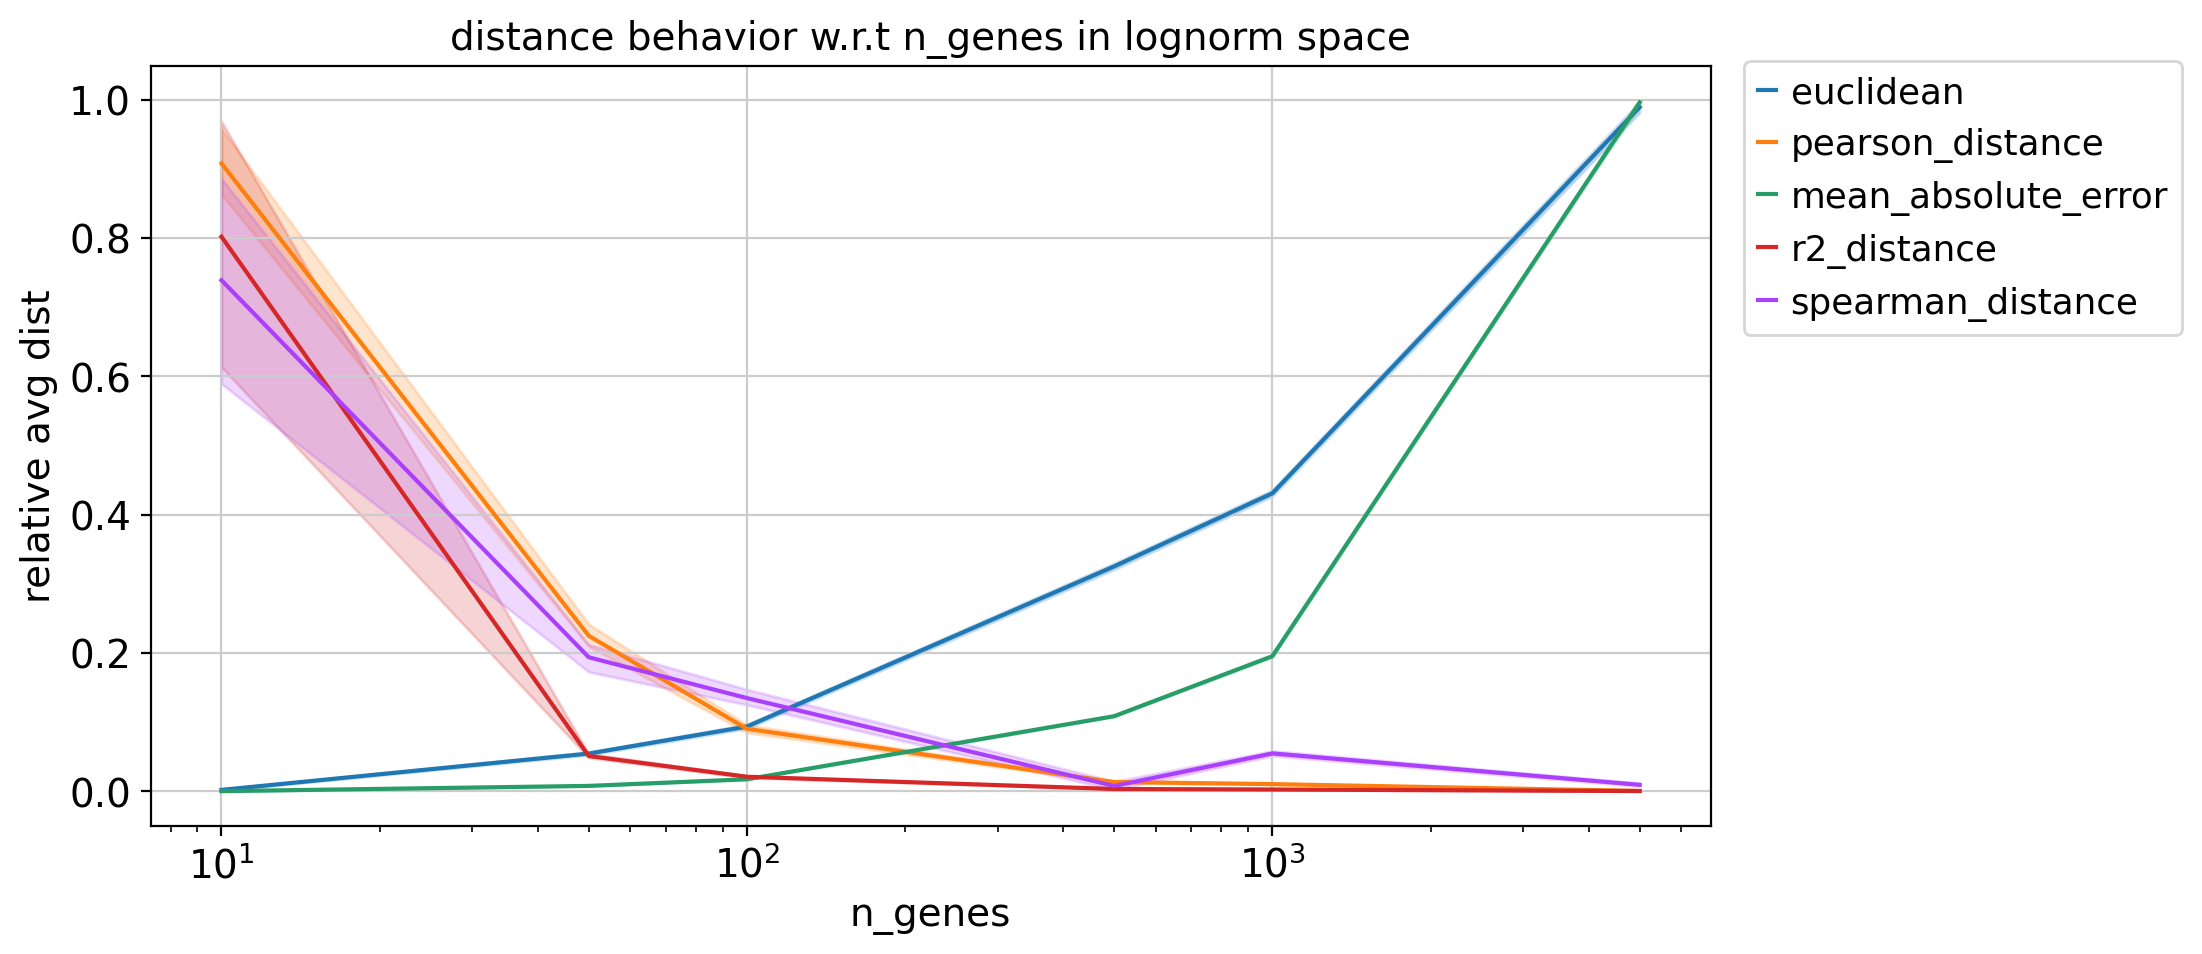

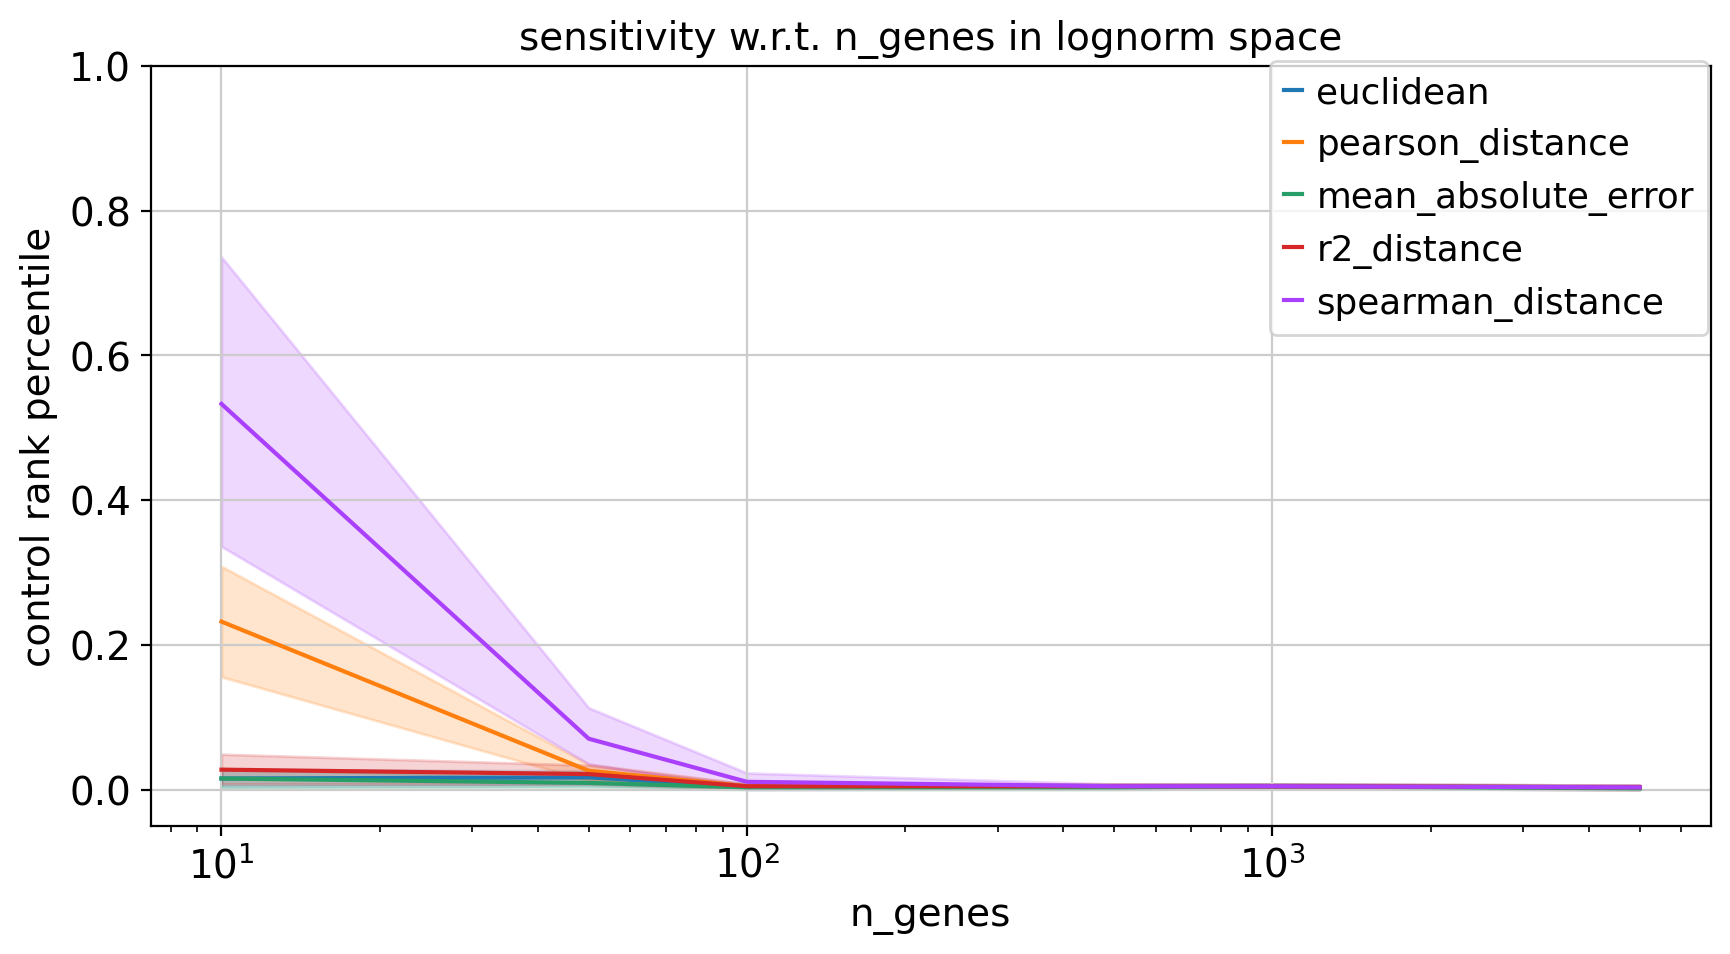

In [17]:
pwdfs, ctrl_ranks = plot(['n_genes', 'lognorm'])

In [18]:
results['5000-lognorm-n_genes'].adata

AnnData object with n_obs × n_vars = 40056 × 5000
    obs: 'ncounts', 'well', 'plate', 'cell_line', 'replicate', 'time', 'dose_value', 'pathway_level_1', 'pathway_level_2', 'perturbation', 'target', 'pathway', 'dose_unit', 'celltype', 'disease', 'cancer', 'tissue_type', 'organism', 'perturbation_type', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'chembl-ID', 'n_genes', 'perturbation_name', 'leiden'
    obsm: 'X_pca'
    layers: 'counts', 'lognorm'

In [20]:
results['5000-lognorm-n_genes'].adata.obs.perturbation.value_counts()

control4                              785
control3                              785
control2                              785
control1                              785
control0                              785
                                     ... 
BMS-265246_100.0                      271
Linifanib (ABT-869)_100.0             271
INO-1001 (3-Aminobenzamide)_1000.0    270
Ki16425_10.0                          270
Resminostat_10.0                      270
Name: perturbation, Length: 131, dtype: int64

In [19]:
results['270-lognorm-n_cells']

AnnData object with n_obs × n_vars = 35370 × 5000
    obs: 'ncounts', 'well', 'plate', 'cell_line', 'replicate', 'time', 'dose_value', 'pathway_level_1', 'pathway_level_2', 'perturbation', 'target', 'pathway', 'dose_unit', 'celltype', 'disease', 'cancer', 'tissue_type', 'organism', 'perturbation_type', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'chembl-ID', 'n_genes', 'perturbation_name', 'leiden'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'lognorm'

In [21]:
results['270-lognorm-n_cells'].adata.obs.perturbation.value_counts()

Busulfan _10000.0                  270
Mercaptopurine (6-MP)_100.0        270
AZD1480_10.0                       270
Thiotepa_100.0                     270
SRT2104 (GSK2245840)_1000.0        270
                                  ... 
Triamcinolone Acetonide_10000.0    270
Tacedinaline (CI994)_10.0          270
Meprednisone_10000.0               270
Lenalidomide (CC-5013)_10000.0     270
control4                           270
Name: perturbation, Length: 131, dtype: int64

In [23]:
results['0.284-lognorm-count_mean'].adata.obs.perturbation.value_counts()

control4                              785
control3                              785
control2                              785
control1                              785
control0                              785
                                     ... 
BMS-265246_100.0                      271
Linifanib (ABT-869)_100.0             271
INO-1001 (3-Aminobenzamide)_1000.0    270
Ki16425_10.0                          270
Resminostat_10.0                      270
Name: perturbation, Length: 131, dtype: int64

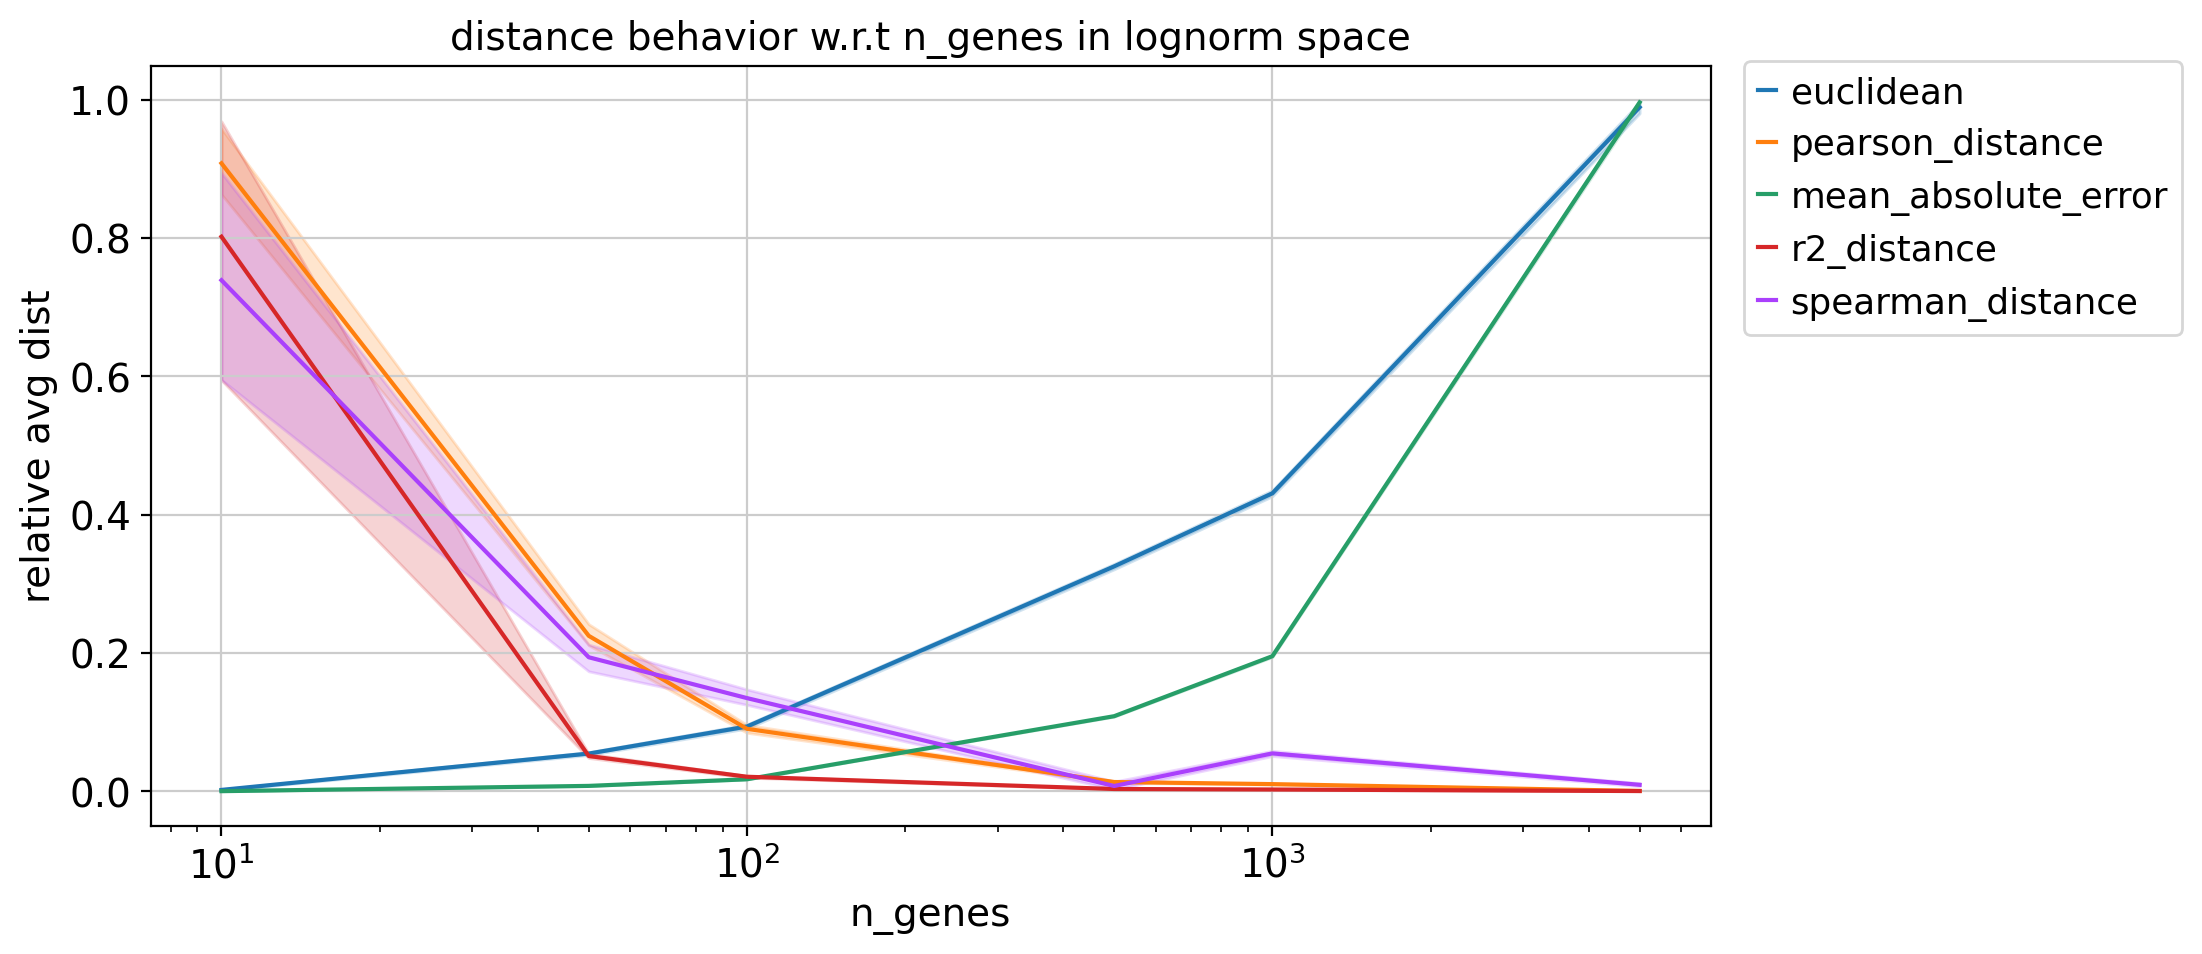

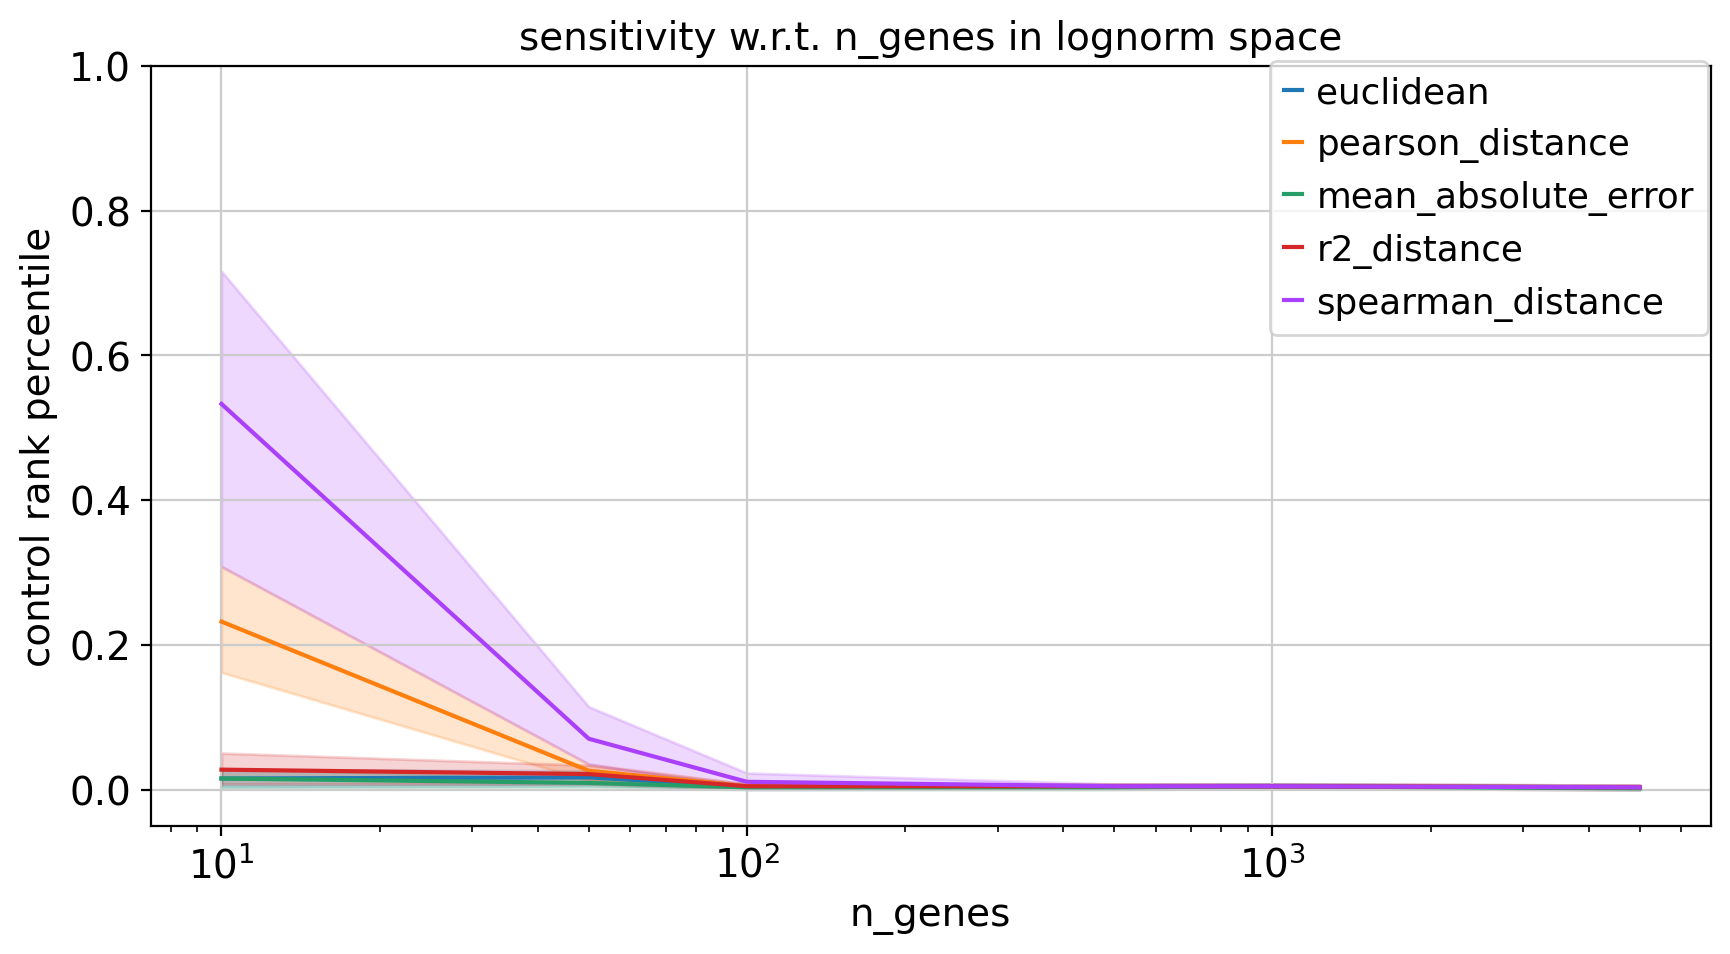

In [38]:
pwdfs = plot(['n_genes', 'lognorm'])

200 HVGs are enough to distinguish control from perturbed.

## n DEGs

## sparsity

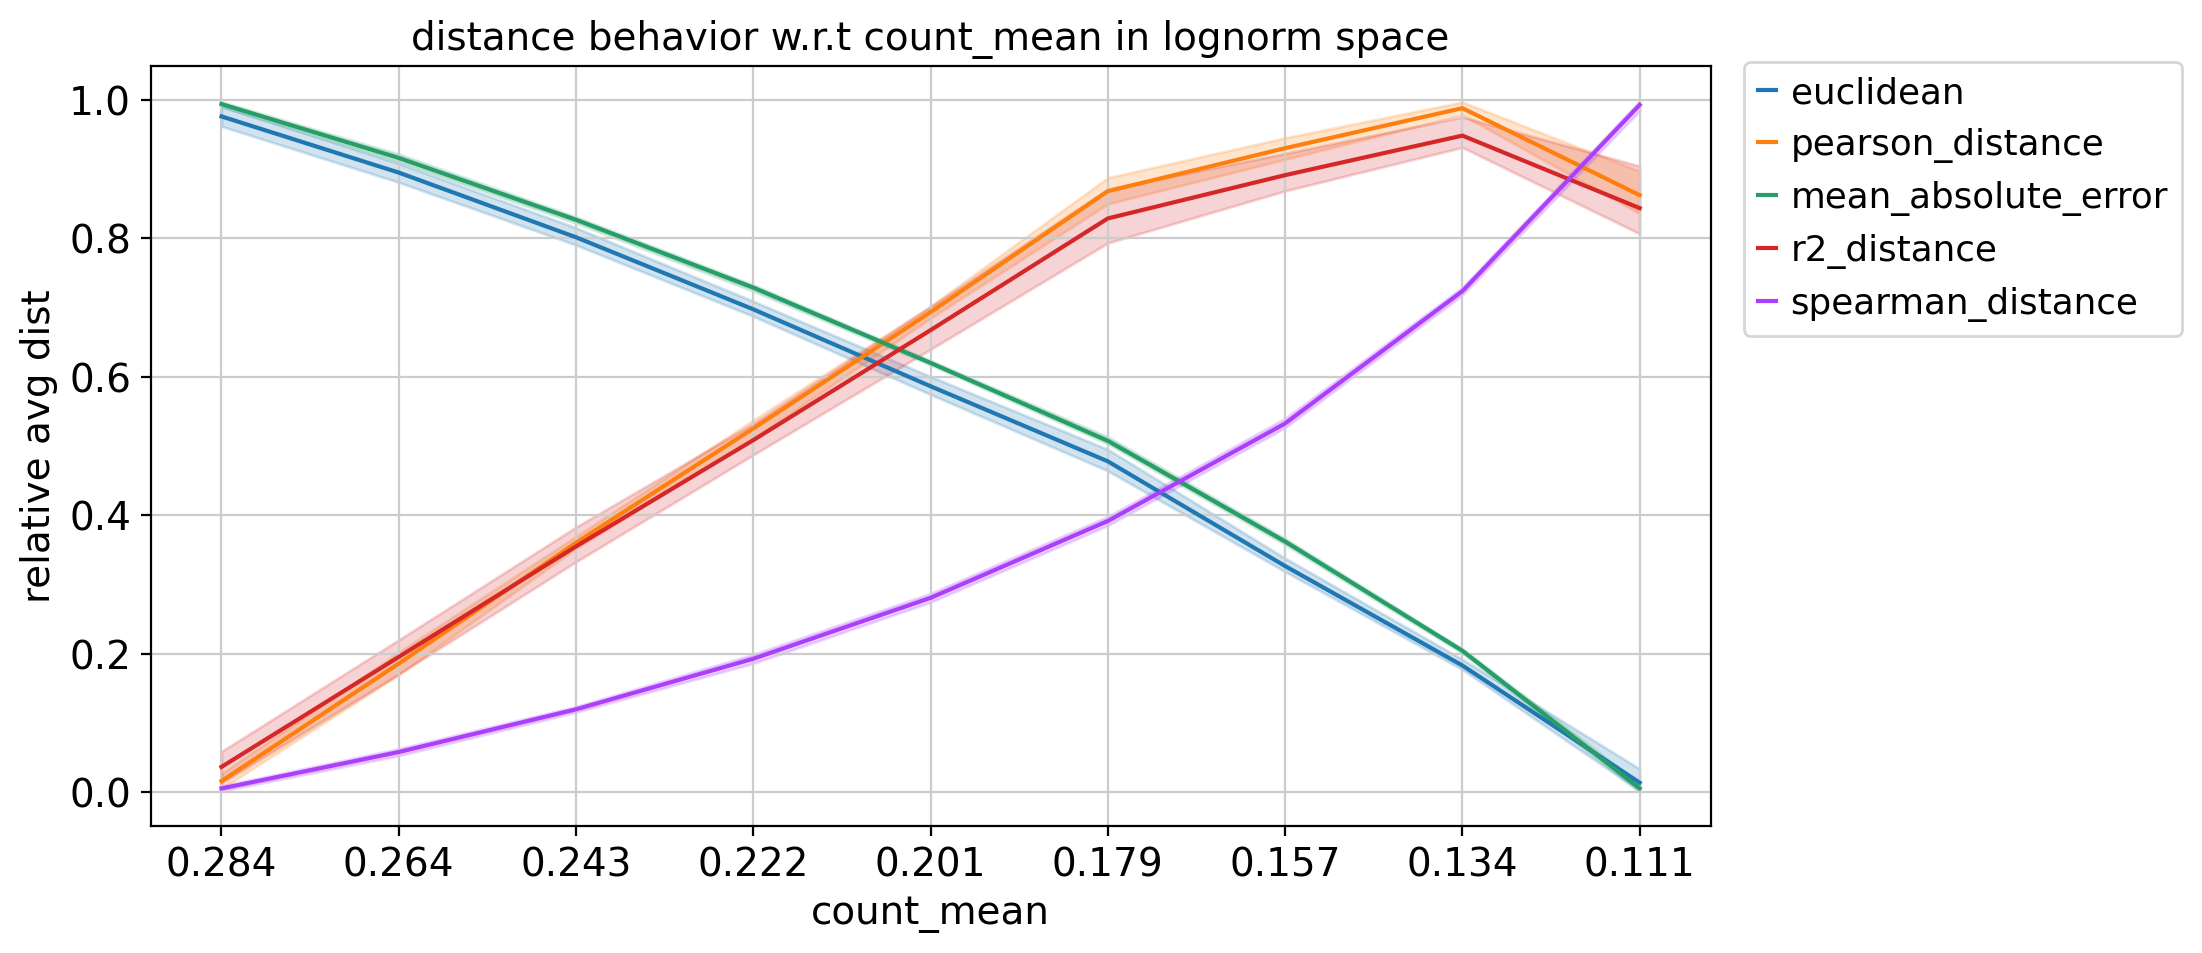

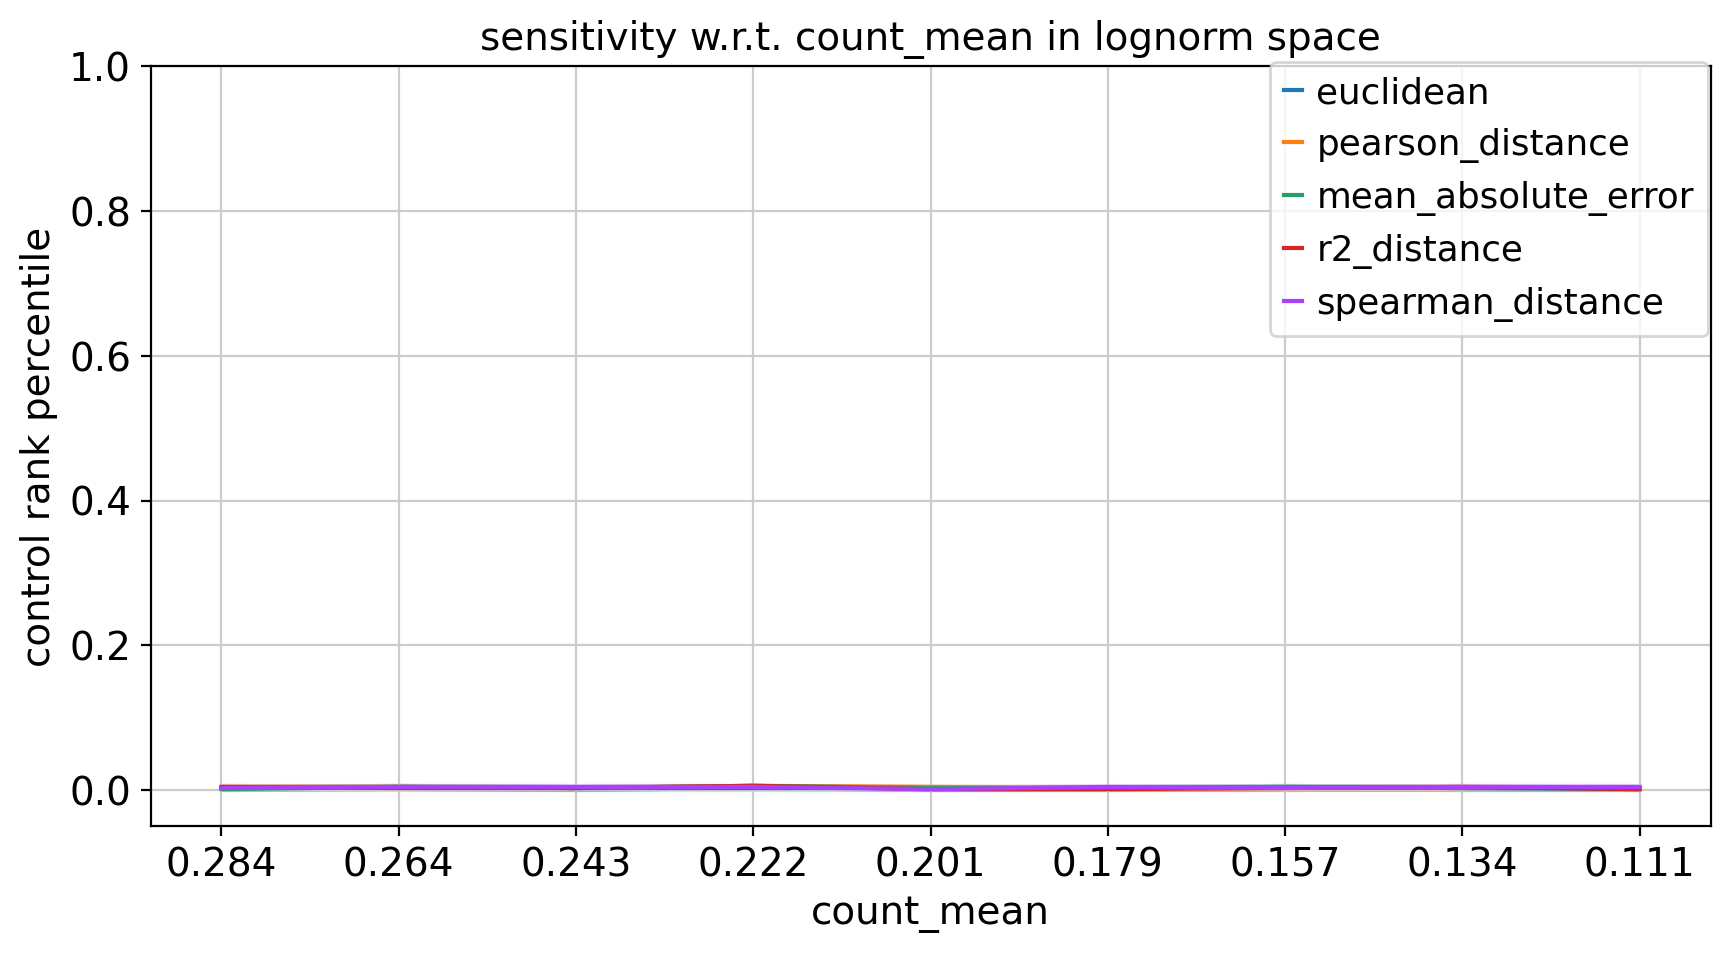

In [18]:
pwdfs = plot(['count_mean', 'lognorm'])

## summary

In [24]:
from utils import get_melted_df_per_perturbation

In [22]:
pwdfs = plot(['n_cells', 'lognorm', '250'], plot=False)

In [28]:
df = get_melted_df_per_perturbation(pwdfs, metrics, controls, 'n_cells', reference='spearman_distance-250')

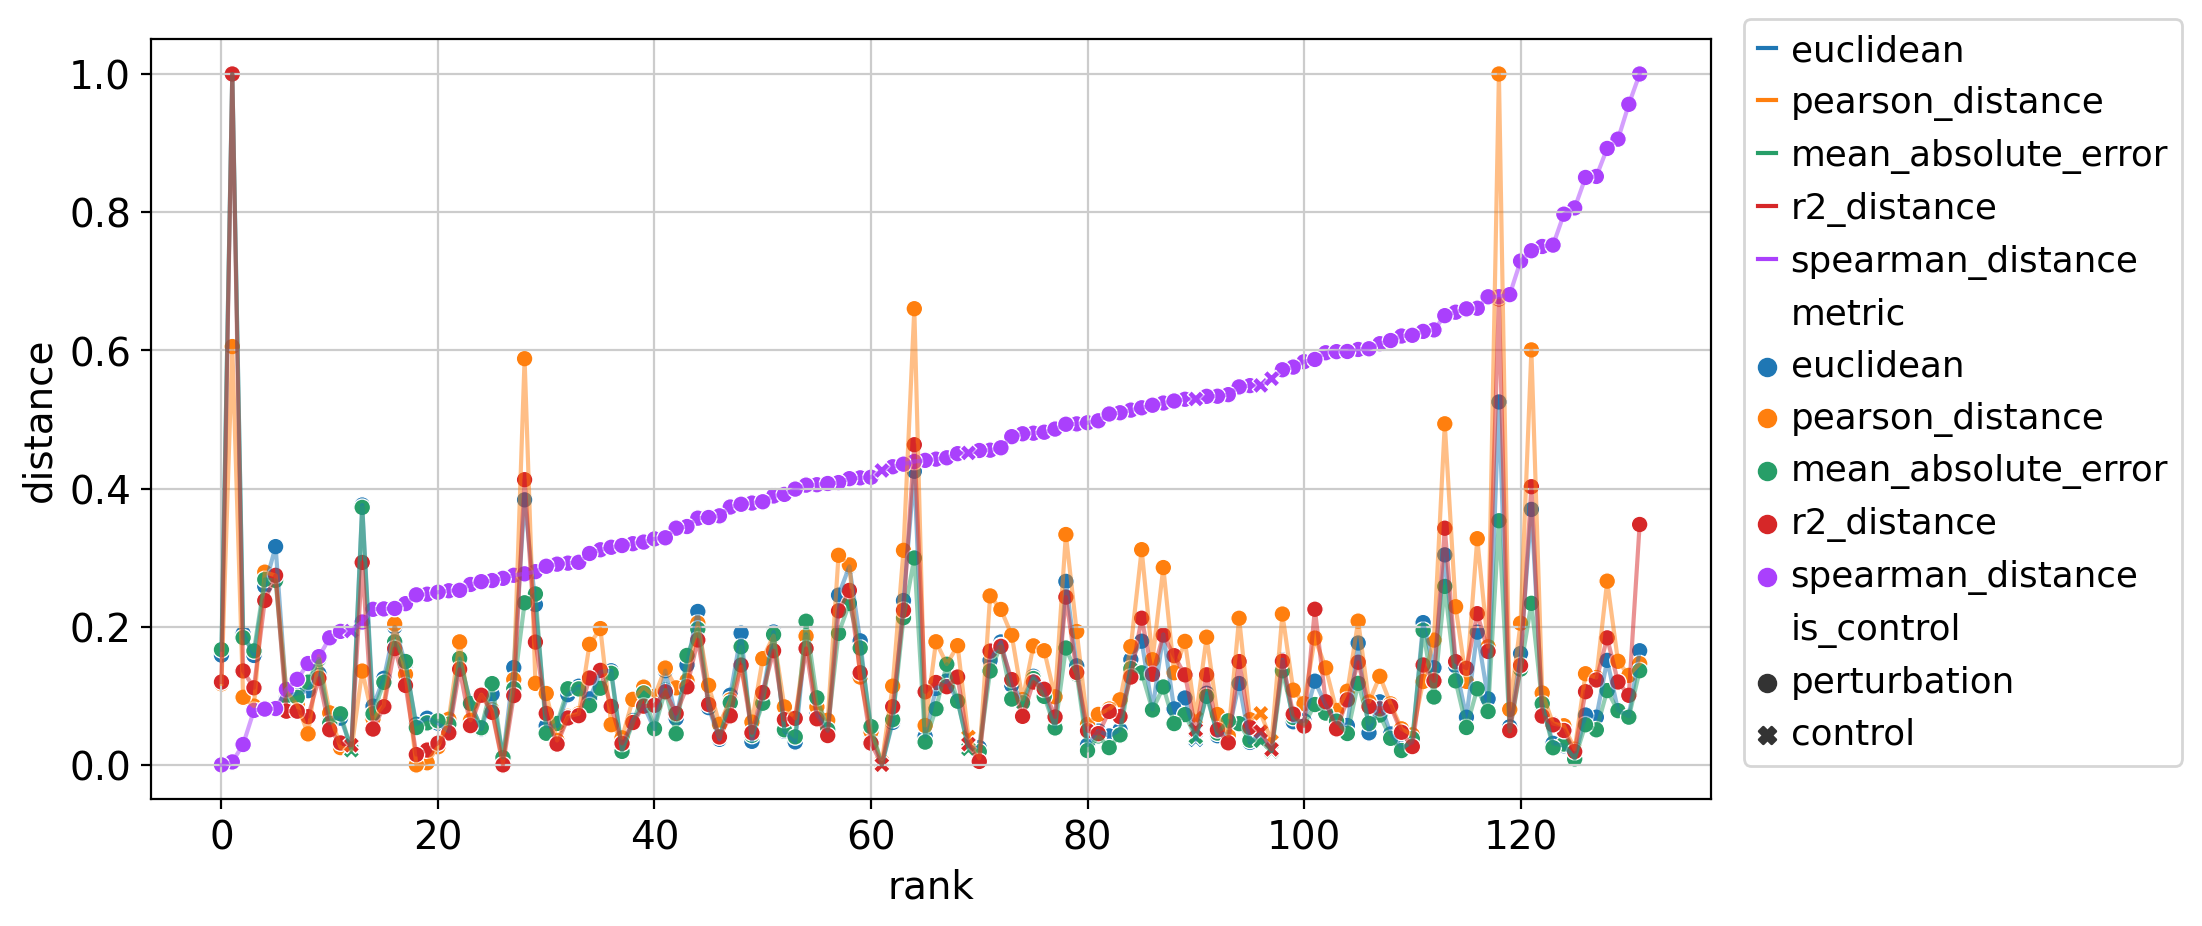

In [29]:
normed_df = normalize_per_metric(df, label='distance')
plt.figure(figsize=(10, 5))
sns.lineplot(data=normed_df, x='rank', y='distance', hue='metric', alpha=.5)
sns.scatterplot(data=normed_df, x='rank', y='distance', hue='metric', style='is_control')
plt.legend(bbox_to_anchor=(1.01, 1.05))

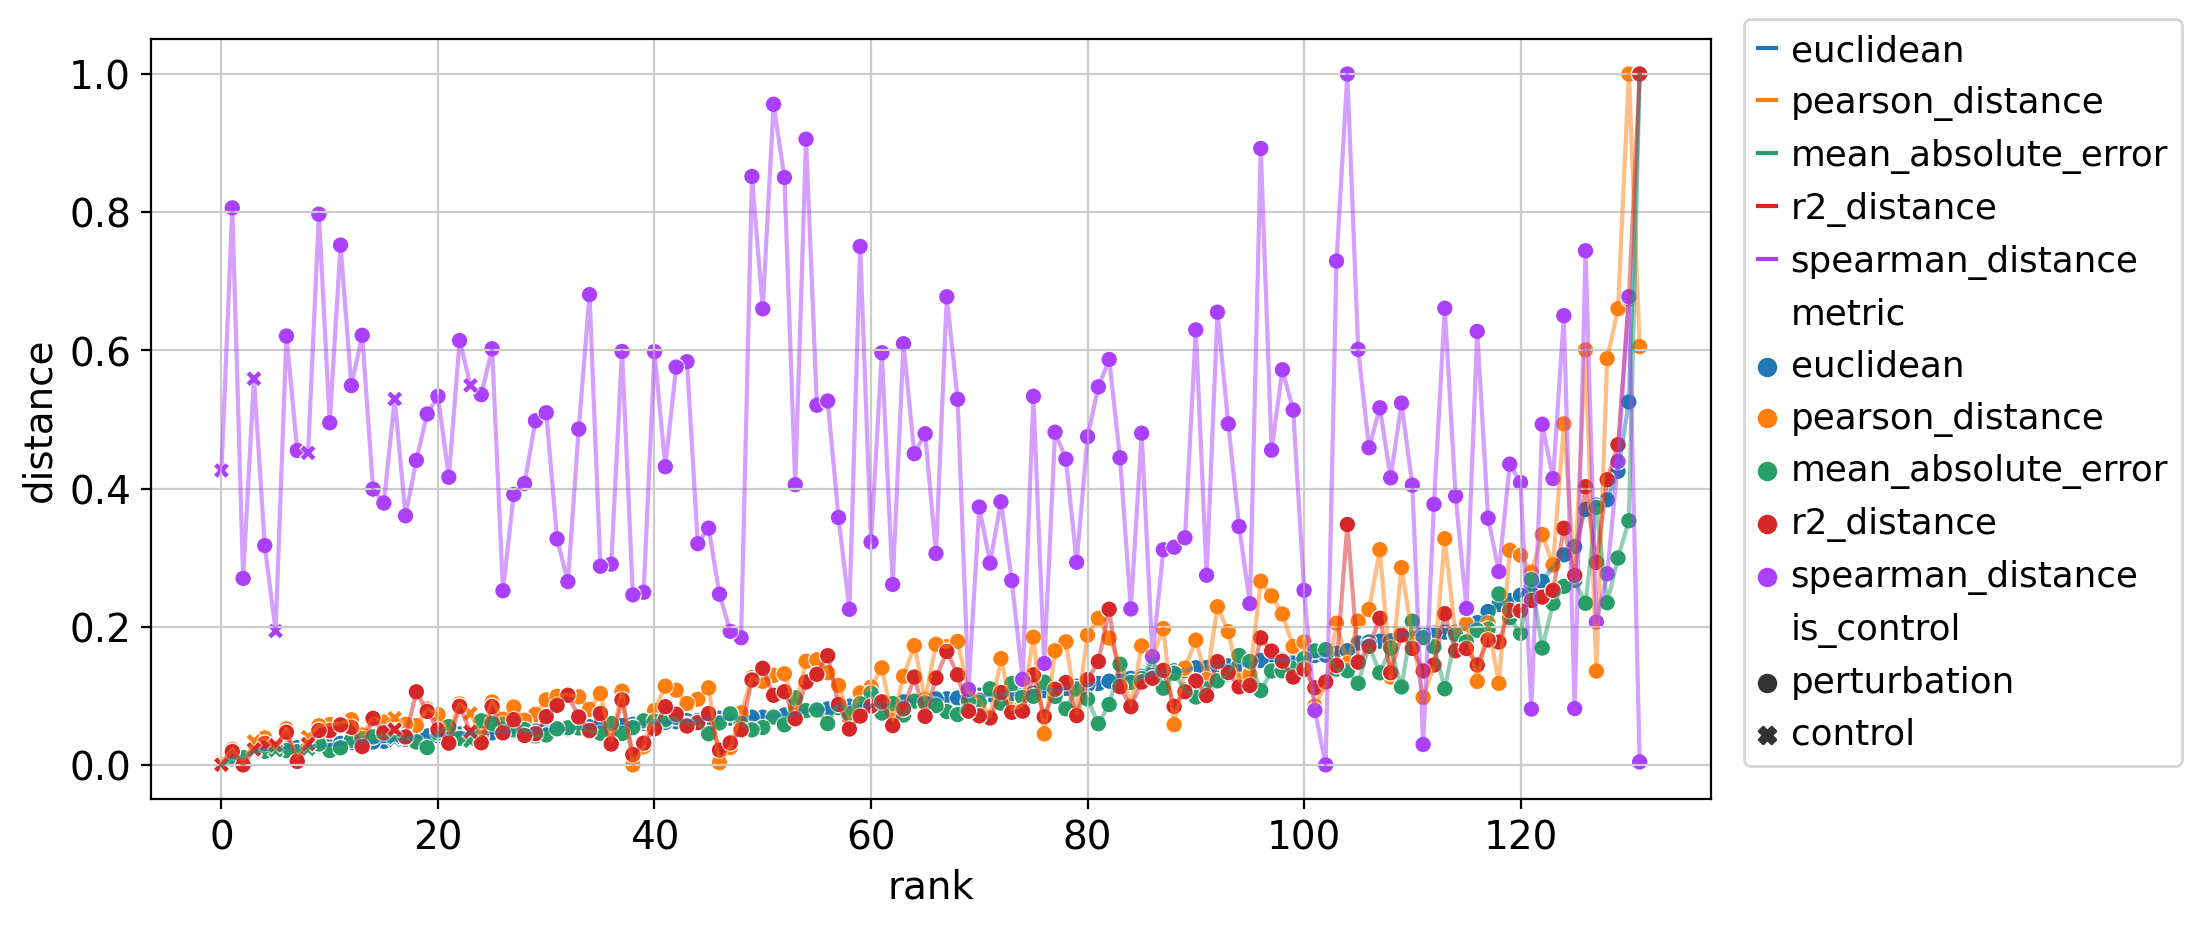

In [27]:
normed_df = normalize_per_metric(df, label='distance')
plt.figure(figsize=(10, 5))
sns.lineplot(data=normed_df, x='rank', y='distance', hue='metric', alpha=.5)
sns.scatterplot(data=normed_df, x='rank', y='distance', hue='metric', style='is_control')
plt.legend(bbox_to_anchor=(1.01, 1.05))

## summary table

### correlation with actual DE factors

Concatenate the _individual_ melted distance dataframes and label with metadata. Calculate and visualize change in distance due to sample size.

In [26]:
# import pertpy as pt

In [27]:
# adata = pt.data.srivatsan_2020_sciplex3()
# adata.obs['perturbation_name'] = adata.obs.perturbation.values
# adata.obs['perturbation'] = adata.obs['perturbation_name'].astype(str) + '_' + adata.obs.dose_value.astype(str)
# adata.obs['perturbation'] = adata.obs['perturbation'].replace({'control_0.0':'control'})

In [ ]:
# adata.obs[['perturbation']]

In [57]:
# # get metadata
# params = pd.read_csv('../splatter_sim_params.csv').reset_index()
# params['perturbation'] = [f'Path{x}' for x in params['index'].values]
# params.perturbation.replace({'Path1': 'control'}, inplace=True)

# def annotate(df, params):
#     # annotate
#     for col in params.columns:
#         df[col] = df['perturbation'].map(dict(zip(params.perturbation, params[col])))
#     df = df.dropna()  # dropping fake controls

In [68]:
import numpy as np
def annotate(df):
    df['dose'] = [0 if 'control' in x else float(x.split('_')[1]) for x in df.perturbation]
    df['log(dose)'] = [0 if 'control' in x else np.log10(float(x.split('_')[1])) for x in df.perturbation]

In [79]:
exp = 'n_cells'
pwdfs, ctrl_ranks = plot([exp, 'lognorm', '250'], plot=False)
df = get_melted_df_per_perturbation(pwdfs, metrics, controls, exp, reference='wasserstein-250')
annotate(df)

Plot rankings together:

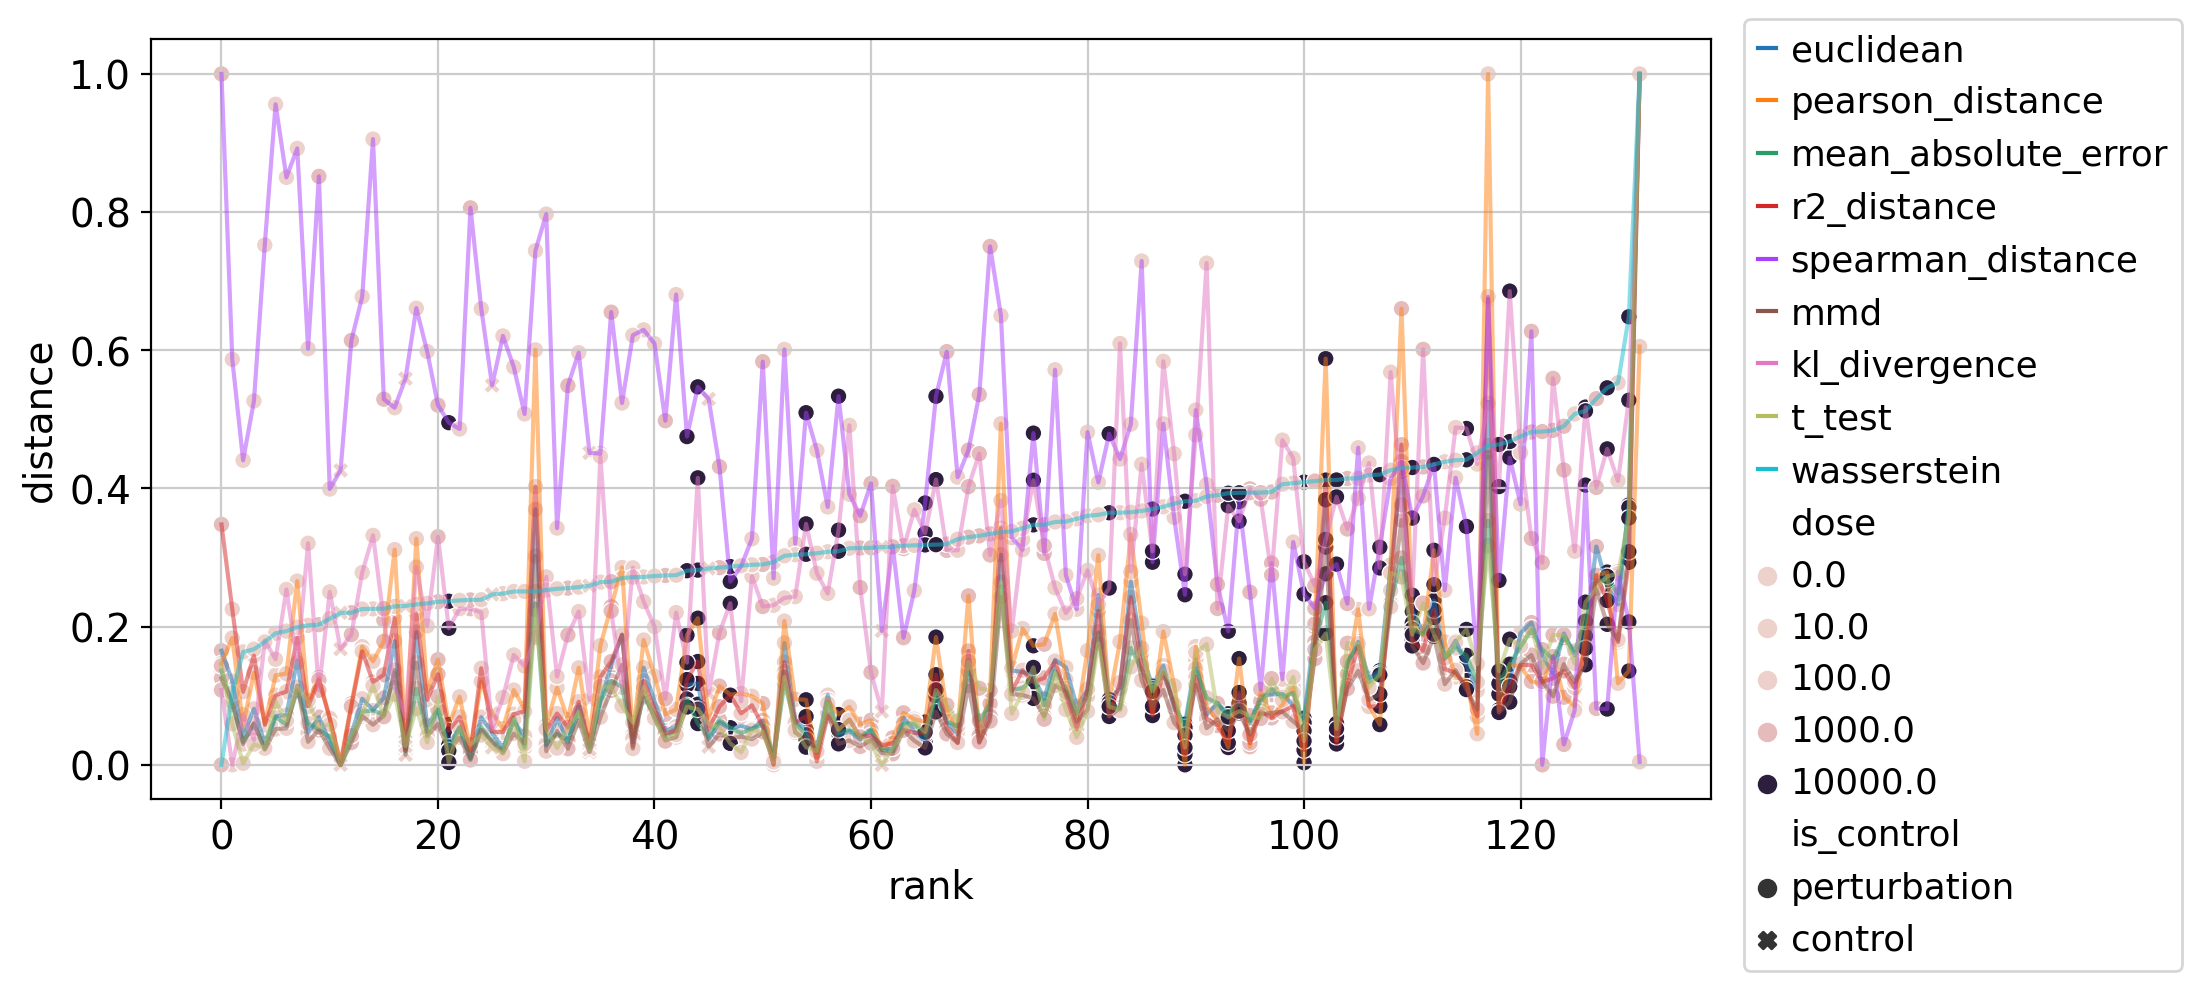

In [80]:
normed_df = normalize_per_metric(df, label='distance')
plt.figure(figsize=(10, 5))
sns.lineplot(data=normed_df, x='rank', y='distance', hue='metric', alpha=.5)
sns.scatterplot(data=normed_df, x='rank', y='distance', hue='dose', style='is_control')
plt.legend(bbox_to_anchor=(1.01, 1.05))

Calculate spearman correlation with dose per metric:

In [71]:
from scipy.stats import spearmanr

In [73]:
df = get_ranked_df_per_perturbation(pwdfs, metrics, controls, exp)
df = df[df.is_control == 'perturbation']
annotate(df)

In [75]:
sr = {}
for m in metrics:
    sub = df[df.metric == m]
    sr[m] = spearmanr(sub['distance'].values, sub.dose.values)[0]
corr_wreal = pd.DataFrame.from_dict(sr, orient='index').sort_values(0)
corr_wreal[0] = 1 - corr_wreal[0]  # flip so smaller is better
corr_wreal.columns = ['1-corr_dose']
corr_wreal

1-corr_dose
spearman_distance       1.259633
pearson_distance        1.117761
r2_distance             1.110451
euclidean               1.004403
mmd                     1.003963
t_test                  0.977835
mean_absolute_error     0.964992
kl_divergence           0.851112
wasserstein             0.721082

### performance in the most realistic scenario

The most realistic scenario for evaluation is 5k highly variable genes, 300 cells per condition, no mislabeling and optimal library size.

In [76]:
pwdfs, ctrl_ranks = plot([exp, 'lognorm'], plot=False)
best_case = ctrl_ranks[ctrl_ranks[exp] == '250']

avg_rank = best_case[['rank', 'metric']].groupby('metric').mean().sort_values('rank')
avg_rank.columns = ['rank_mean']

var_rank = best_case[['rank', 'metric']].groupby('metric').var().sort_values('rank')*100
var_rank.columns = ['rank_var*100']

### summary

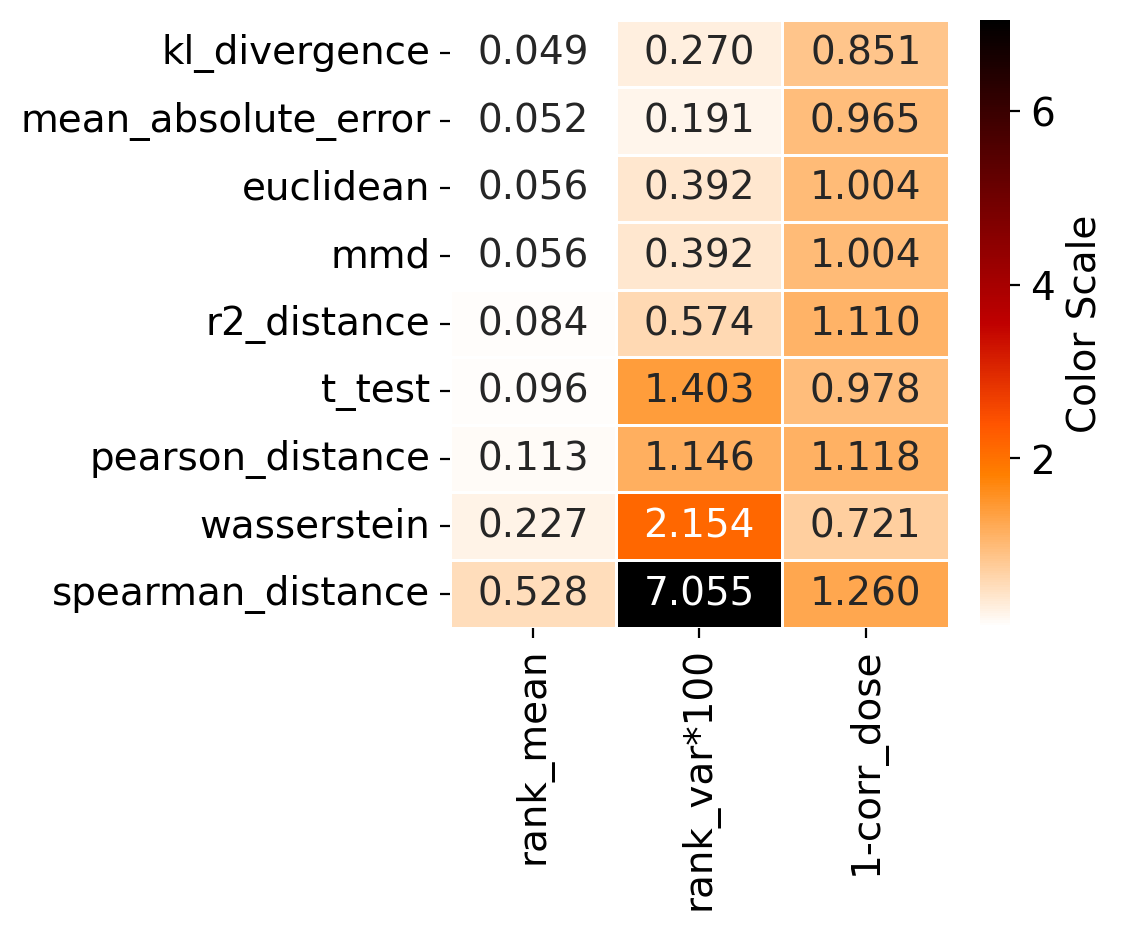

In [77]:
df = pd.concat([avg_rank, var_rank, corr_wreal], axis=1)
# df = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=0)
sns.heatmap(df, annot=True, cmap='gist_heat_r', fmt=".3f", linewidths=.5, cbar_kws={'label': 'Color Scale'})
plt.grid(None)

In [78]:
df

rank_mean  rank_var*100  1-corr_dose
kl_divergence         0.048855      0.269798     0.851112
mean_absolute_error   0.051908      0.190548     0.964992
euclidean             0.056489      0.392168     1.004403
mmd                   0.056489      0.392168     1.003963
r2_distance           0.083969      0.573976     1.110451
t_test                0.096183      1.403182     0.977835
pearson_distance      0.112977      1.146204     1.117761
wasserstein           0.227481      2.154303     0.721082
spearman_distance     0.528244      7.054950     1.259633

winners = ['pearson_distance', 'r2_distance', 't_test']

## between metric correlation

In [84]:
pwdfs, ctrl_ranks = plot([exp, 'lognorm'], plot=False)
df = pd.concat([pwdfs[f'{metric}-250'].loc[['control0']] for metric in metrics]).T
df.columns = metrics
df = df.reset_index()
annotate(df)
df = df.dropna()

Correlation between winners and runner ups:

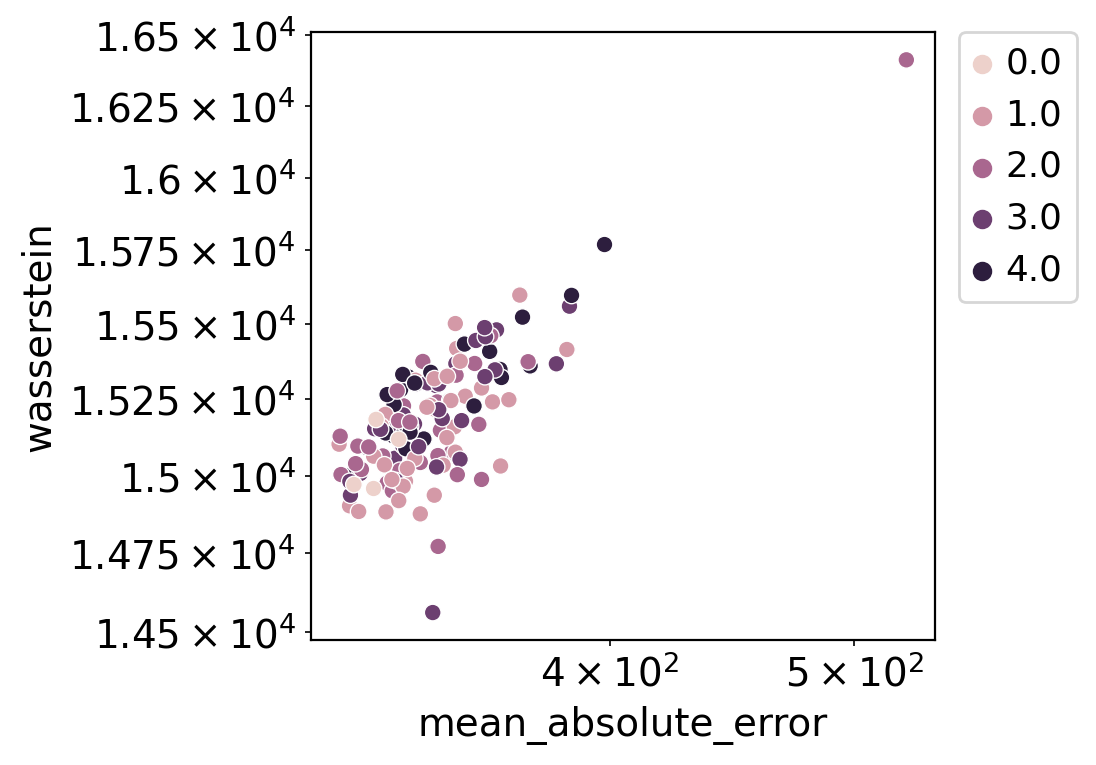

In [88]:
sns.scatterplot(data=df, x='mean_absolute_error', y='wasserstein', hue='log(dose)')
plt.xscale('log')
plt.yscale('log')
plt_legend()

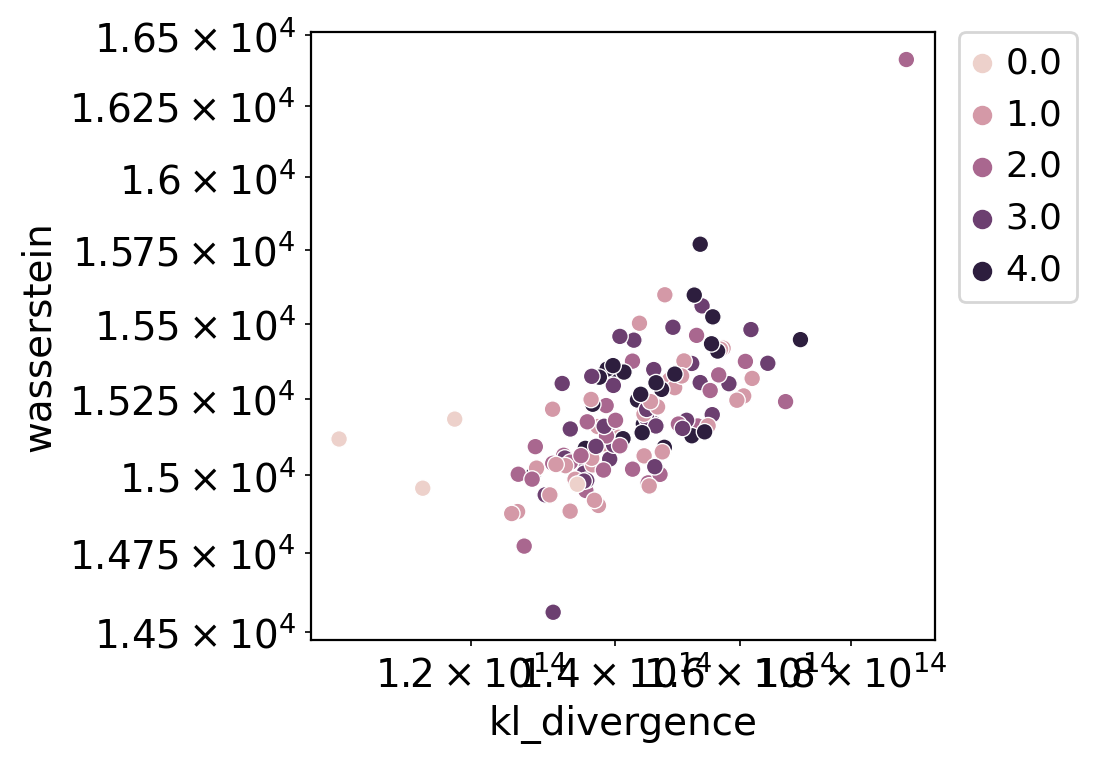

In [89]:
sns.scatterplot(data=df, x='kl_divergence', y='wasserstein', hue='log(dose)')
plt.xscale('log')
plt.yscale('log')
plt_legend()